<a href="https://colab.research.google.com/github/thendralbala/ML_from_scratch/blob/main/5_Extracting_Confidence_Measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracting Confidence Measurements

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
def load_data(input_file):
  X = []
  y = []

  with open(input_file,'r') as f:
    for line in f.readlines():
      data = [float(x) for x in line.split(',')]
      X.append(data[:-1])
      y.append(data[-1])

  X = np.array(X)
  y = np.array(y)


  return X,y


In [13]:
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here:
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15),
                textcoords = 'offset points',
                horizontalalignment = 'right',
                verticalalignment = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

In [5]:
input_file = 'data_multivar.txt'
X, y = load_data(input_file)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

`decision_function:` This function provides a signed distance of a data point to the decision boundary. A positive value indicates the point is on the side of the hyperplane assigned to the positive class, while a negative value indicates the opposite. Larger absolute values imply higher confidence in the classification.

In [10]:
input_datapoints = np.array([[2, 1.5], [8,9], [4.8, 5.2], [4,4], [2.5,7], [7.6,2], [5.4,5.9]])
print("Distance from the boundary:")
for i in input_datapoints:
  print(i, '-->', classifier.decision_function([i])[0])

Distance from the boundary:
[2.  1.5] --> 1.272654331986262
[8. 9.] --> 0.7849150445463313
[4.8 5.2] --> -1.862280327774372
[4. 4.] --> -0.16763605816348237
[2.5 7. ] --> 0.7490935853523655
[7.6 2. ] --> 1.7334078304727718
[5.4 5.9] --> -1.3692112254603999


SVCs typically output a decision function value, which represents the distance of a data point from the decision boundary. This value is not a probability. By applying Platt scaling, you can transform the decision function values into probability estimates, making the SVC's output more interpretable and useful for decision-making.

`predict_proba:` This function estimates the probability of a data point belonging to each class. It requires setting probability=True when initializing the SVC model.
This internally enables Platt scaling to provide probability estimates using predict_proba.

In [12]:
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)

print("Confidence measure:")
for i in input_datapoints:
  print(i, '-->', classifier.predict_proba([i])[0])


Confidence measure:
[2.  1.5] --> [0.02850713 0.97149287]
[8. 9.] --> [0.09692791 0.90307209]
[4.8 5.2] --> [0.99189531 0.00810469]
[4. 4.] --> [0.57544595 0.42455405]
[2.5 7. ] --> [0.10560633 0.89439367]
[7.6 2. ] --> [0.00854007 0.99145993]
[5.4 5.9] --> [0.9700135 0.0299865]


By combining the confidence measurements (decision_function, predict_proba) and the visualization from the plot, you can gain a deeper understanding of how the SVC classifier is making its predictions and the level of confidence associated with those predictions. This information can be valuable for assessing the model's performance and identifying potential areas for improvement.

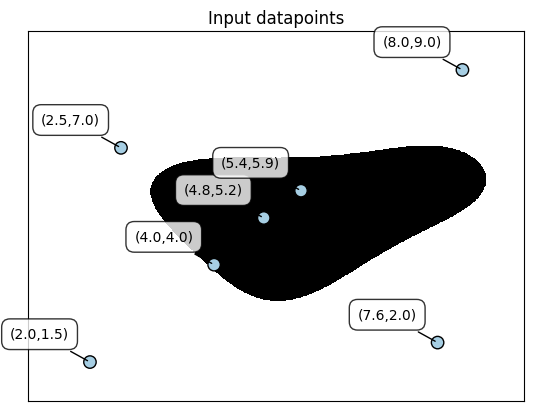

In [14]:
plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True')
plt.show()